In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
#reading the dataset
df = pd.read_csv("output.csv")
df.head()

,age,job,marital,education,smoker,monthlyincome,houseowner,loan,contact,MOD,monthlyhouseholdincome,target_buy
0,30,unemployed,married,primary,no,6787,no,no,cellphone,79,6915,yes
1,33,services,married,secondary,no,9789,yes,yes,cellphone,220,10049,yes
2,35,services,single,Graduate,no,6350,yes,no,cellphone,185,6587,yes
3,59,blue-collar,married,secondary,no,5000,yes,no,unknown,226,5193,yes
4,36,self-employed,married,Graduate,no,5307,yes,no,cellphone,341,5326,yes


In [3]:
#Chi square test 
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [6]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [7]:
#adding dummy variable for testing
df['dummyvar'] = np.random.choice([0,1], size=(len(df),),p=[0.5,0.5])
df.head()

,age,job,marital,education,smoker,monthlyincome,houseowner,loan,contact,MOD,monthlyhouseholdincome,target_buy,dummyvar
0,30,unemployed,married,primary,no,6787,no,no,cellphone,79,6915,yes,1
1,33,services,married,secondary,no,9789,yes,yes,cellphone,220,10049,yes,0
2,35,services,single,Graduate,no,6350,yes,no,cellphone,185,6587,yes,1
3,59,blue-collar,married,secondary,no,5000,yes,no,unknown,226,5193,yes,1
4,36,self-employed,married,Graduate,no,5307,yes,no,cellphone,341,5326,yes,1


In [8]:
cT=ChiSquare(df)
#feature Selection output
testColumns = ['age','job','marital','smoker','monthlyincome','houseowner','loan','contact','MOD','monthlyhouseholdincome','dummyvar']

for var in testColumns:
    cT.TestIndependence(colX=var,colY="target_buy" )

age is IMPORTANT for Prediction
job is IMPORTANT for Prediction
marital is IMPORTANT for Prediction
smoker is NOT an important predictor. (Discard smoker from model)
monthlyincome is IMPORTANT for Prediction
houseowner is IMPORTANT for Prediction
loan is IMPORTANT for Prediction
contact is IMPORTANT for Prediction
MOD is IMPORTANT for Prediction
monthlyhouseholdincome is IMPORTANT for Prediction
dummyvar is NOT an important predictor. (Discard dummyvar from model)


In [9]:
#removing the dummy variable
df.drop('dummyvar',axis=1, inplace=True)
df.head()

,age,job,marital,education,smoker,monthlyincome,houseowner,loan,contact,MOD,monthlyhouseholdincome,target_buy
0,30,unemployed,married,primary,no,6787,no,no,cellphone,79,6915,yes
1,33,services,married,secondary,no,9789,yes,yes,cellphone,220,10049,yes
2,35,services,single,Graduate,no,6350,yes,no,cellphone,185,6587,yes
3,59,blue-collar,married,secondary,no,5000,yes,no,unknown,226,5193,yes
4,36,self-employed,married,Graduate,no,5307,yes,no,cellphone,341,5326,yes


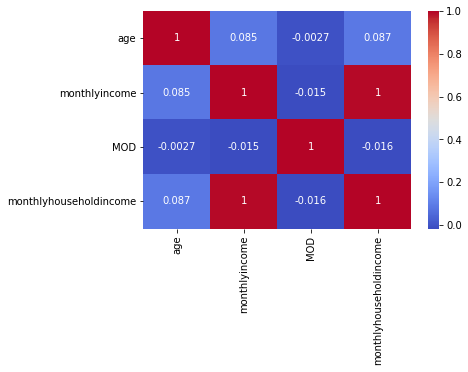

In [15]:
#producing the heatmap for correlations among numerical variables
tc = df.corr()
sns.heatmap(tc,annot=True, cmap='coolwarm')

In [ ]:
'''
link-
http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python

'''